<a href="https://colab.research.google.com/github/mvince33/Coding-Dojo/blob/main/Multivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multivariate Analysis & Visualizations

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load the [cleaned medical data](https://drive.google.com/file/d/15QvGnjlYvVd8bxl-Fl_EPVgmfvgATGZB/view?usp=sharing) using the url in the cell below:

In [7]:
## excel file url
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vRUYiMWJ3WI6lrrG8rdRFy49aaKSqtlZhbqHodoJfQeDnWj1bgvdSCVM0tnlTkExjhSv7f0LSfIiTVU/pub?output=xlsx"

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_excel(url)
df.head()

,State,Lat,Lng,Area,Children,Age,Income,Marital,Gender,ReAdmis,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Base_charge,Additional_charges
0,AL,34.34960,-86.72508,Suburban,1.0,53.0,86575.93,Divorced,Male,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,Blood Work,10.585770,3726.702860,17939.40342
1,FL,30.84513,-85.22907,Urban,3.0,51.0,46805.99,Married,Female,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,Intravenous,15.129562,4193.190458,17612.99812
2,SD,43.54321,-96.63772,Suburban,3.0,53.0,14370.14,Widowed,Female,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Blood Work,4.772177,2434.234222,17505.19246
3,MN,43.89744,-93.51479,Suburban,0.0,78.0,39741.49,Married,Male,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,Blood Work,1.714879,2127.830423,12993.43735
4,OK,35.67302,-95.19180,Urban,3.0,76.0,81999.88,Never Married,Male,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,Blood Work,5.957250,2636.691180,12742.58991


1) This is a fun place to start!  Make a scatterplot with Lng on the x axis and Lat on the y axis. 
- You can use plt.scatter() or sns.scatterplot(). 
- I recommend looking up the documentation to see how to use these functions.

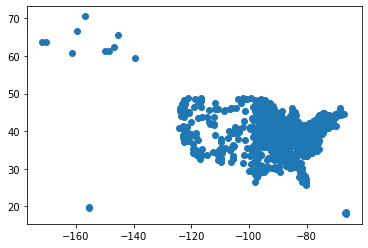

In [10]:
# matplotlib
x = df['Lng']
y = df['Lat']
plt.scatter(x, y)

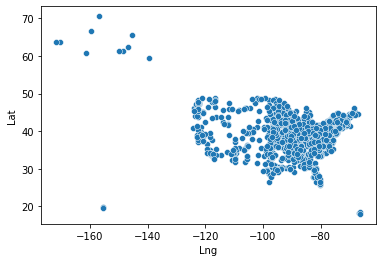

In [11]:
# seaborn
sns.scatterplot(x = x, y = y)

2a) Make a scatterplot that shows the Base_charge vs. Initial_days
- Use plt.scatter() or sns.scatterplot()

- Is there a relationship between Base_charge and Initial_days?

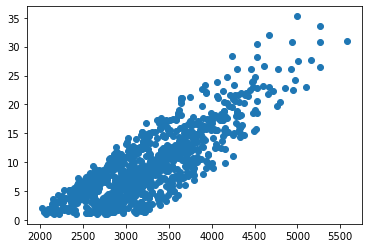

In [12]:
# There is a positive correlation between initial days and base charge
# matplotlib
plt.scatter(df['Base_charge'], df['Initial_days'])

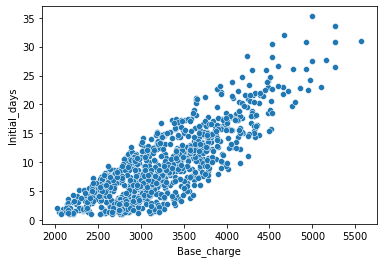

In [13]:
# seaborn
sns.scatterplot(x = df['Base_charge'], y = df['Initial_days'])

2a-Alternative) Make a [seaborn regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html) that shows the Base_charge vs. Initial_days. 
What advantage does the regplot have over the scatterplot, in terms of identifying relationships?
- Use sns.regplot(data=df, x=column name, y=column name, line_kws={'color':'black', 'ls': '--'})

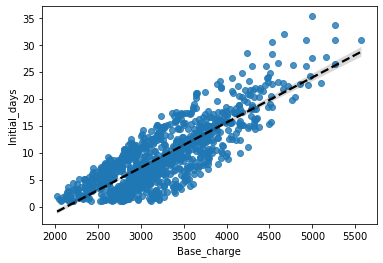

In [14]:
sns.regplot(x = df['Base_charge'], y = df['Initial_days'], data=df, line_kws={'color':'black', 'ls':'--'})

2b) Make a scatterplot that shows the Base_charge vs. Initial days that is color-coded based on the complication risk. 
What have you learned about complication risk, days and charge?
- Use sns.scatterplot() using the hue argument for the third variable.

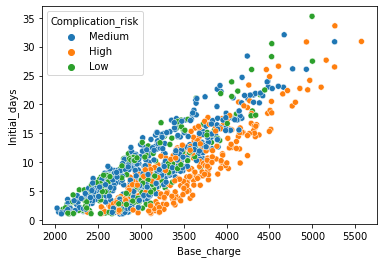

In [26]:
sns.scatterplot(x = df['Base_charge'], y = df['Initial_days'], hue = df['Complication_risk'])

2b) Make an lmplot that shows the Base_charge vs. Initial days that is color-coded based on the complication risk. 
- Use sns.lmplot() using the hue argument for the third variable.
- Does this graph have any advantage over the previous scatterplot graph?


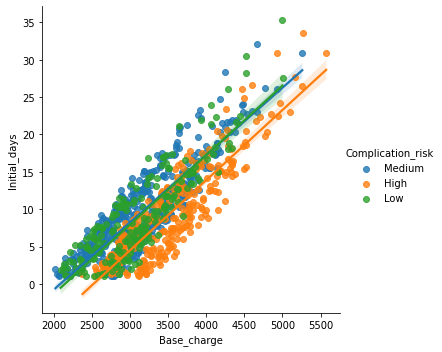

In [28]:
sns.lmplot(data = df, x = 'Base_charge', y = 'Initial_days', hue = 'Complication_risk')

3) Make a barchart to show the average initial days for those with each level of complication risk. (hint: use groupby to groupby the Complication Risk and find the average of the initial days.) 
- If you need help with this, refer to slides 24 and 25 in the presentation.

<BarContainer object of 3 artists>

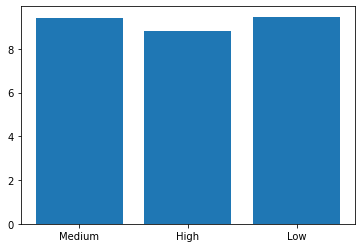

In [33]:
init_days_by_comp_risk = df.groupby('Complication_risk')['Initial_days'].mean()
init_days_by_comp_risk
plt.bar(df['Complication_risk'].value_counts().index,  init_days_by_comp_risk)

Make the same barchart from 3) using seaborn. Set x equal to complication risk, y equal to initial days and use the order argument for low, medium, high
- sns.barplot(data=df, x=column name, y=column name, order=['Low', 'Medium', 'High'])

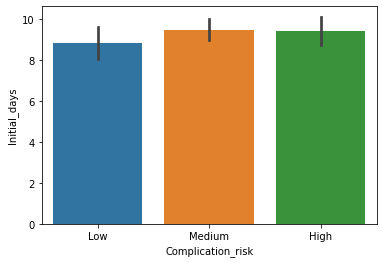

In [34]:
#seaborn
sns.barplot(data = df, x = 'Complication_risk', y = 'Initial_days', order = ['Low', 'Medium', 'High'])

4a) Create a filter to limit the dataset to only those who have high blood pressure (1 = yes, 0 = no).  

How many people have high blood pressure? (Hint: Find the length of your filter)


In [43]:
high_bp = df[df['HighBlood'] == 1]
high_bp
len(high_bp)

402


4b) Now create a bar chart that shows the service received for only those who have high blood pressure.  
- filter['Column name'].value_counts().plot(kind='bar')

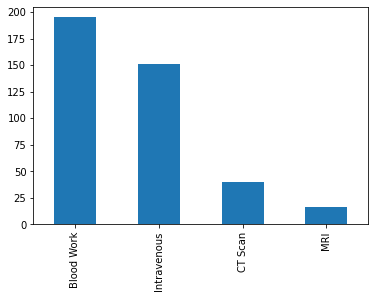

In [48]:
high_bp['Services'].value_counts().plot(kind = 'bar')

Now create the same graph using seaborn.
- sns.countplot(data=filter, x='column name')

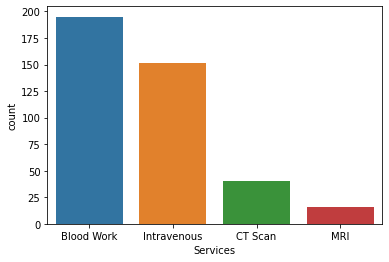

In [49]:
# seaborn
sns.countplot(data = high_bp, x = 'Services')

5) Create a heatmap to show any potential correlations in this data
- If you need assistance with this, refer to slide 20 in the presentation

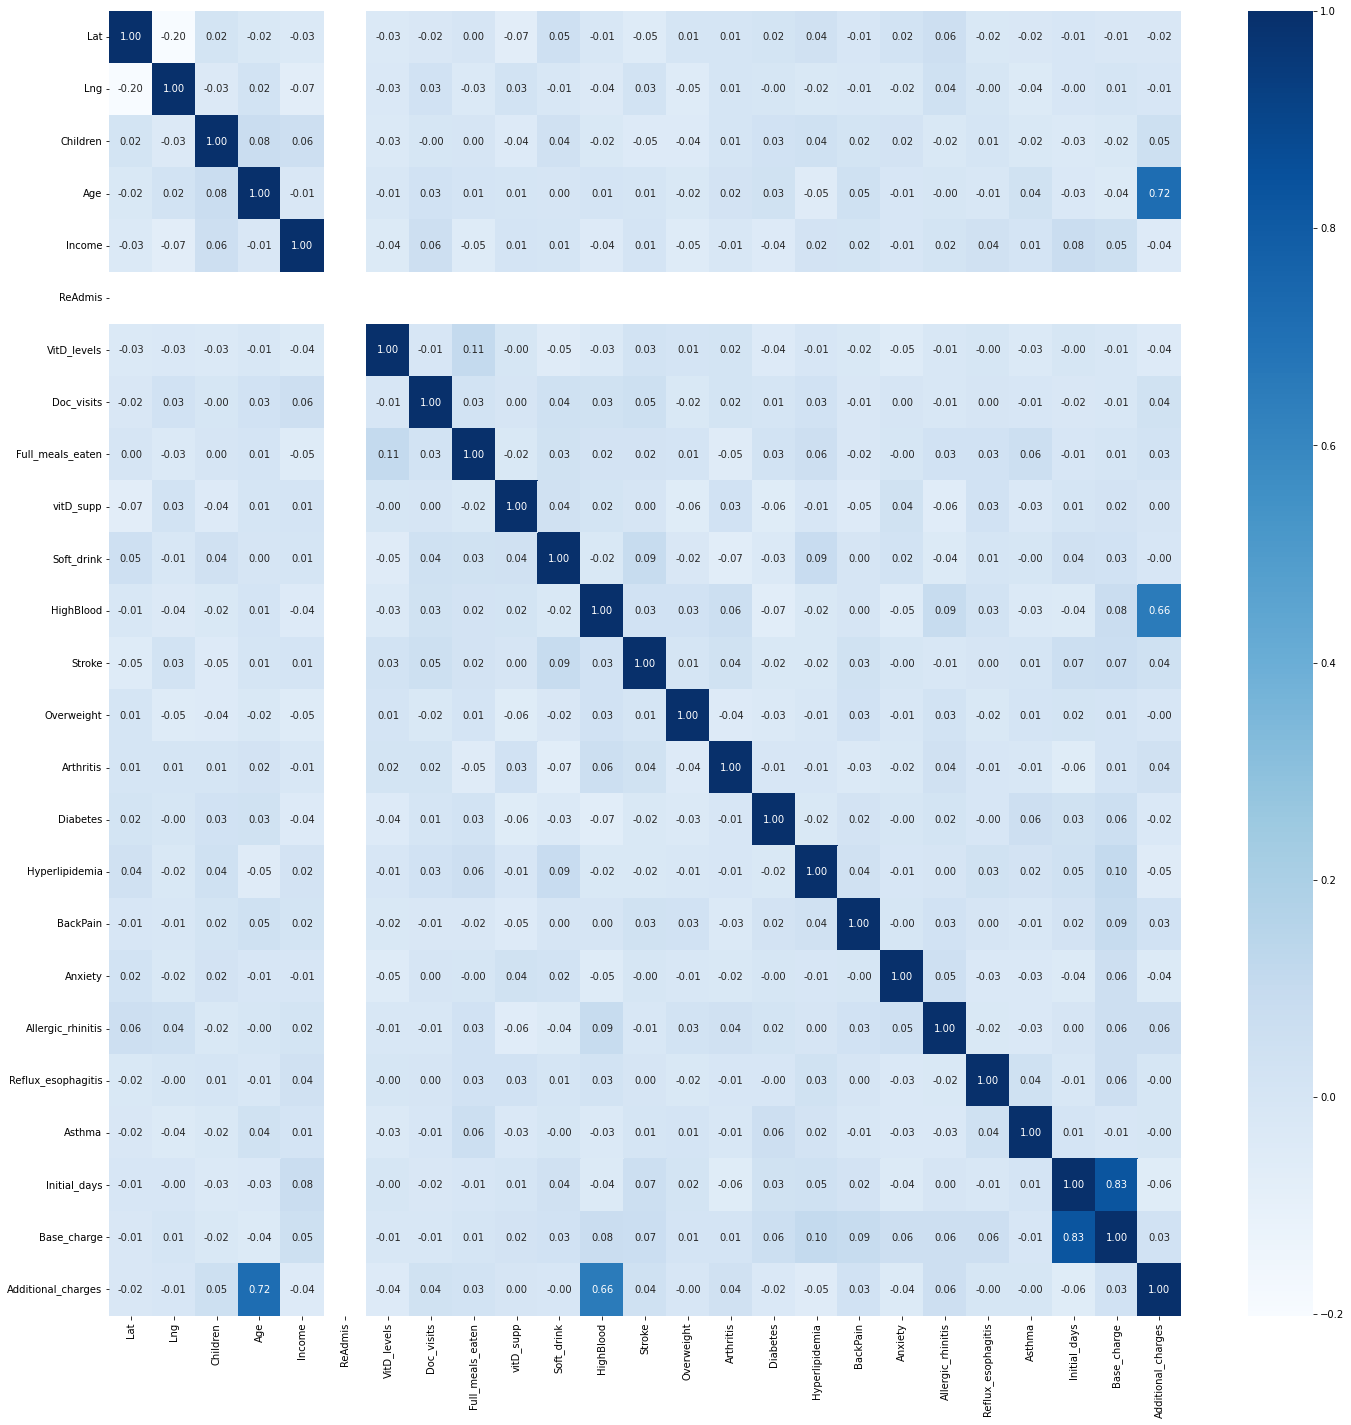

In [61]:
corr = df.corr()
plt.figure(figsize = (24, 24))
sns.heatmap(corr, cmap = 'Blues', annot = True, fmt = '0.2f')

6) Make a multivariate boxplot graph to compare the distribution of income by gender.
- Use pandas to create the boxplot.
- df.boxplot(by='column name', column = 'column name', grid = False)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


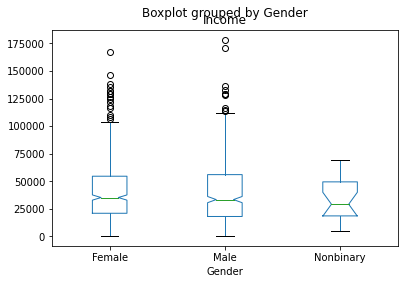

In [56]:
# pandas
df.boxplot(by='Gender', column = 'Income', grid = False, notch = True)


Now create a boxplot using seaborn.
- sns.boxplot()

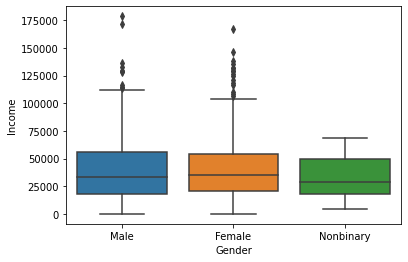

In [57]:
# seaborn
sns.boxplot(data = df, x = 'Gender', y = 'Income')